## Compare all methods

In [8]:
# Import required modules for file processing and comparison
import os
from scsc import simple_process_files
from scsc import full_comparison_output

# Get the absolute path of the current working directory
files_path = os.path.abspath(os.getcwd())
# Navigate up one level to the parent directory
parent_path = os.path.dirname(files_path)
# Construct the path to the target directory containing Python files
target_path = os.path.join(parent_path, "datasets", "small")
# Load file names and contents from the target directory
file_names, file_contents = simple_process_files(target_path)

In [9]:
# Compare files using the 'ted' method and save results to a specified CSV file
res_ted = os.path.join(parent_path, 'compare_all_methods', 'res_2693_ted.csv')
full_comparison_output(file_names, file_contents, method='ted', csv_file=res_ted)

'Full comparison report generated: /Users/edsoneddy/Projects/Personal/scsc/notebooks/compare_all_methods/res_2693_ted.csv'

In [10]:
# Compare files using the 'lf' method and save results to a specified CSV file
res_lf = os.path.join(parent_path, 'compare_all_methods', 'res_2693_lf.csv')
full_comparison_output(file_names, file_contents, method='lf', csv_file=res_lf)

'Full comparison report generated: /Users/edsoneddy/Projects/Personal/scsc/notebooks/compare_all_methods/res_2693_lf.csv'

In [11]:
# Compare files using the 'mdiff' method and save results to a specified CSV file
res_mdiff = os.path.join(parent_path, 'compare_all_methods', 'res_2693_mdiff.csv')
full_comparison_output(file_names, file_contents, method='mdiff', csv_file=res_mdiff)

'Full comparison report generated: /Users/edsoneddy/Projects/Personal/scsc/notebooks/compare_all_methods/res_2693_mdiff.csv'

In [12]:
# Compare files using the 'csim' method and save results to a specified CSV file
res_csim = os.path.join(parent_path, 'compare_all_methods', 'res_2693_csim.csv')
full_comparison_output(file_names, file_contents, method='csim', csv_file=res_csim)

'Full comparison report generated: /Users/edsoneddy/Projects/Personal/scsc/notebooks/compare_all_methods/res_2693_csim.csv'

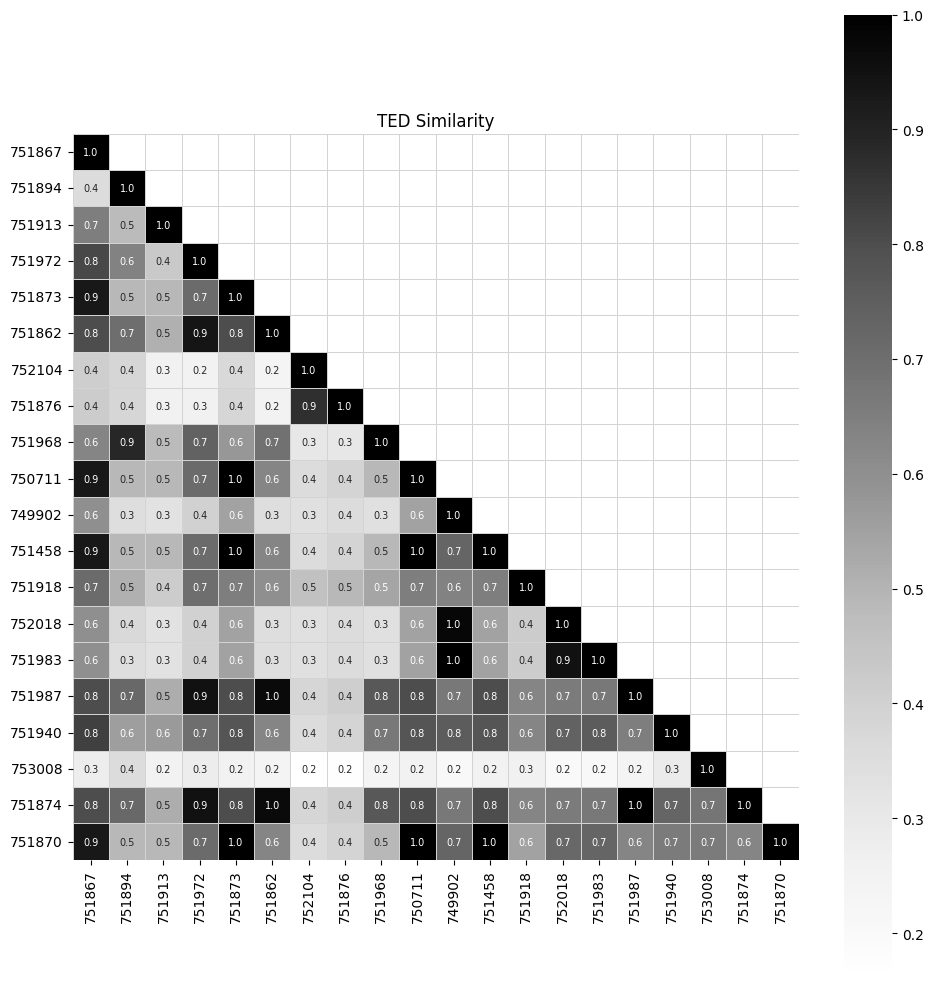

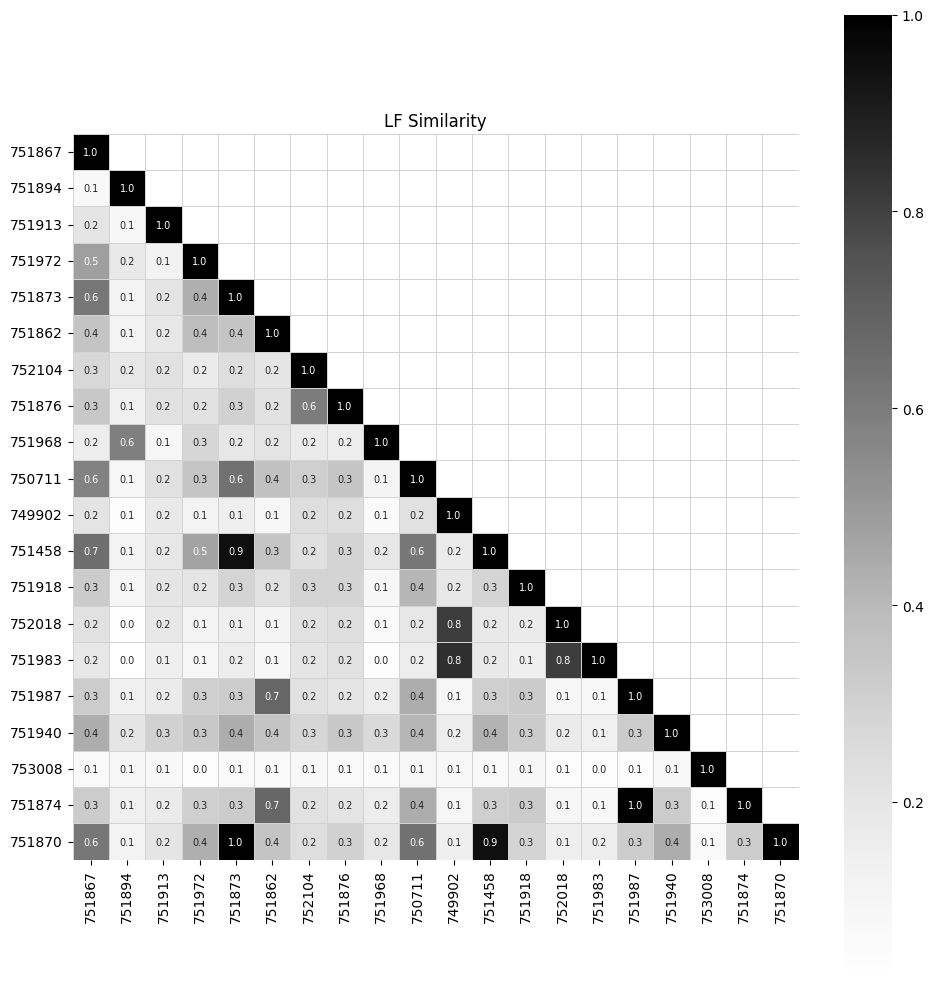

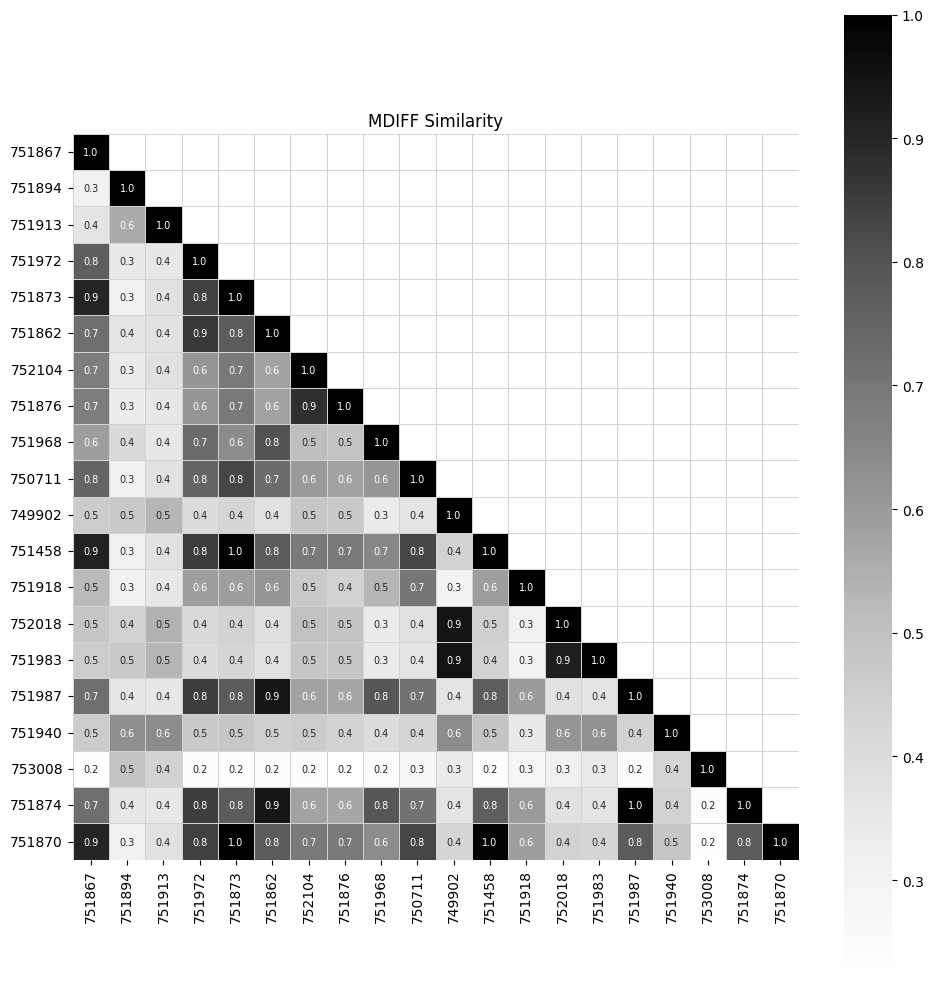

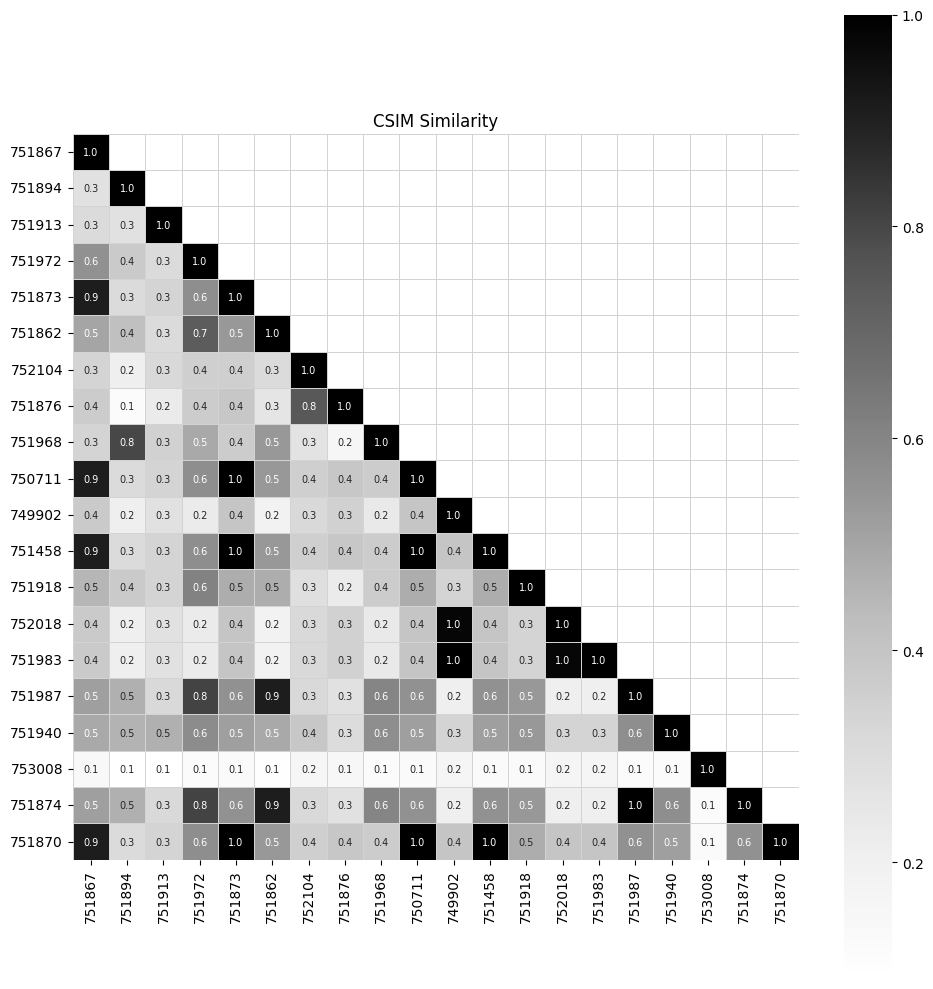

In [13]:
# Import necessary modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np

def load_and_plot_correlation(csv_file, title=None):
    # Load dataset, setting the first column as the index
    data = pd.read_csv(csv_file, index_col=0)
    N = data.shape[0]

    # Scale figure size for readability at N≈21
    size = max(10, min(25, N * 0.45))
    fig, ax = mp.subplots(figsize=(size, size))

    # Mask only the upper triangle (keep diagonal)
    mask = np.triu(np.ones_like(data, dtype=bool), k=1)

    # Choose whether to annotate based on N
    use_annot = N <= 25
    annot_kws = {'size': 7} if use_annot else None

    # Plotting heatmap directly from the loaded data with the mask
    sb.heatmap(
        data,
        mask=mask,
        annot=use_annot,
        fmt='.1f',
        cmap='Greys',
        square=True,
        linewidths=0.5,
        linecolor='lightgray',
        cbar=True,
        annot_kws=annot_kws,
        ax=ax
    )

    # Tick label rotation for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    if title:
        ax.set_title(title)

    mp.tight_layout()
    mp.show()

load_and_plot_correlation(res_ted, title='TED Similarity')
load_and_plot_correlation(res_lf, title='LF Similarity')
load_and_plot_correlation(res_mdiff, title='MDIFF Similarity')
load_and_plot_correlation(res_csim, title='CSIM Similarity')